**Import all the Libraries**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [46]:
data = pd.read_csv(
    'Online_Retail.csv',
    encoding='ISO-8859-1',
    engine='python',
    on_bad_lines='skip'
)

In [47]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [48]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')
data['CustomerID'] = pd.to_numeric(data['CustomerID'], errors='coerce')

**INFORMATION OF COLUMNS IN THE DATA**

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Description of Numeric Features

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Description of Non-Numeric data

In [51]:
data.describe(exclude=['float64','int64']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114
Country,541909,38,United Kingdom,495478


Check for Null Values

In [52]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [53]:
data.shape

(541909, 8)

Delete all the missing Records

In [54]:
data.dropna(inplace=True)

In [55]:
data.shape

(406829, 8)

In [56]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Checking whether negative value is available for column Quantity and Unit PriceID

In [57]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [58]:
data[data['UnitPrice']<0].shape[0]

0

In [59]:
data.shape

(406829, 8)

Drop from Quantity column which have the values less than 0

In [60]:
data.drop(data[data['Quantity']<0].index,inplace=True)

In [61]:
data.shape

(397924, 8)

Calculation of Total amount or monetary value

In [62]:
data['Sales']  =data['Quantity']*data['UnitPrice']
new_data=data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


Calculating the number of Transcations for each Customer

In [63]:
num_trans=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


Calculate the Last Transcation customer has made

In [64]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'], errors='coerce')

In [65]:
data['Last Transaction']= (data['InvoiceDate'].max()-data['InvoiceDate']).dt.days

In [66]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,373
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,373
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,373


In [67]:
lt=data.groupby(['CustomerID','Country'])['Last Transaction'].max().reset_index()
lt

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


merge dataframe and columns

In [68]:
merge_table=pd.merge(lt,num_trans,how='inner',on='CustomerID')
merge_table

,CustomerID,Country,Last Transaction,InvoiceNo
0,12346.0,United Kingdom,325,1
1,12347.0,Iceland,366,182
2,12348.0,Finland,357,31
3,12349.0,Italy,18,73
4,12350.0,Norway,309,17
...,...,...,...,...
4342,18280.0,United Kingdom,277,10
4343,18281.0,United Kingdom,180,7
4344,18282.0,United Kingdom,125,12
4345,18283.0,United Kingdom,336,756


In [69]:
new_df=pd.merge(merge_table,new_data,how='inner',on='CustomerID')
new_df

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


Removal of Outliers using boxplot

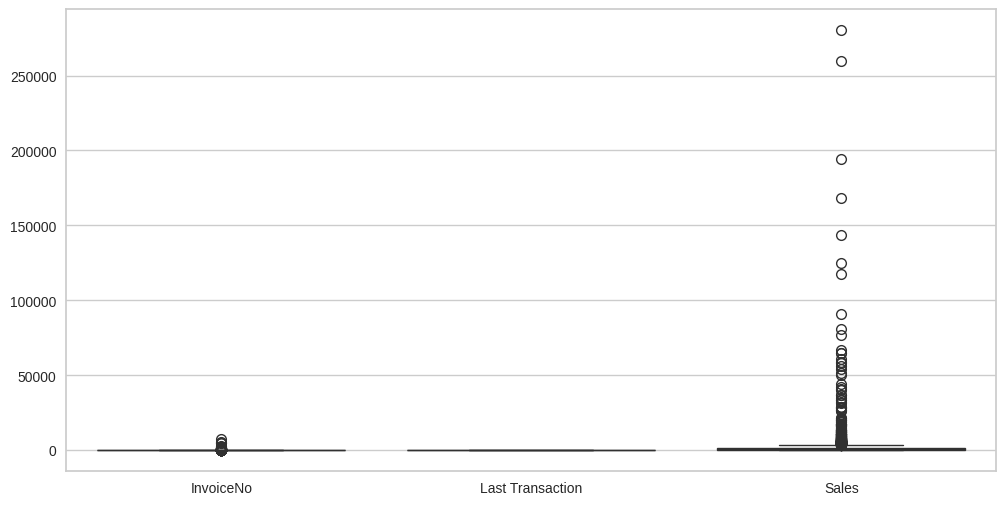

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df[['InvoiceNo','Last Transaction','Sales']])
plt.show()

In [71]:

IQR=new_df['Sales'].quantile(0.75) - new_df['Sales'].quantile(0.25)
lowerlimit=new_df['Sales'].quantile(0.25) - (IQR*1.5)
upperlimit=new_df['Sales'].quantile(0.75) + (IQR*1.5)
new_df_iqr=new_df[(new_df['Sales']<upperlimit) & (new_df['Sales']>lowerlimit)]
new_df_iqr.shape

(3923, 5)

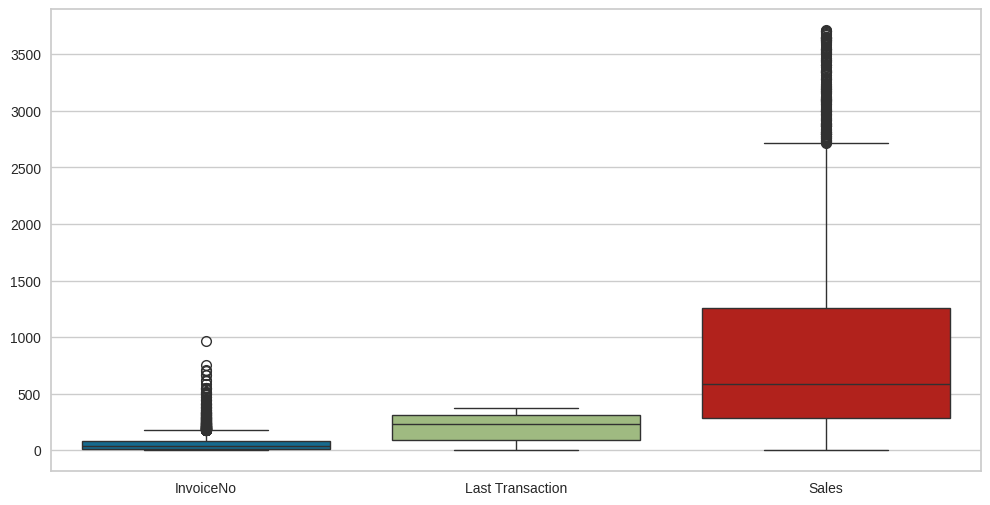

In [72]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df_iqr[['InvoiceNo','Last Transaction','Sales']])
plt.show()

In [73]:
new_df_iqr.reset_index(drop=True,inplace=True)
new_df_iqr

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


Visualization of Correlation heatmap


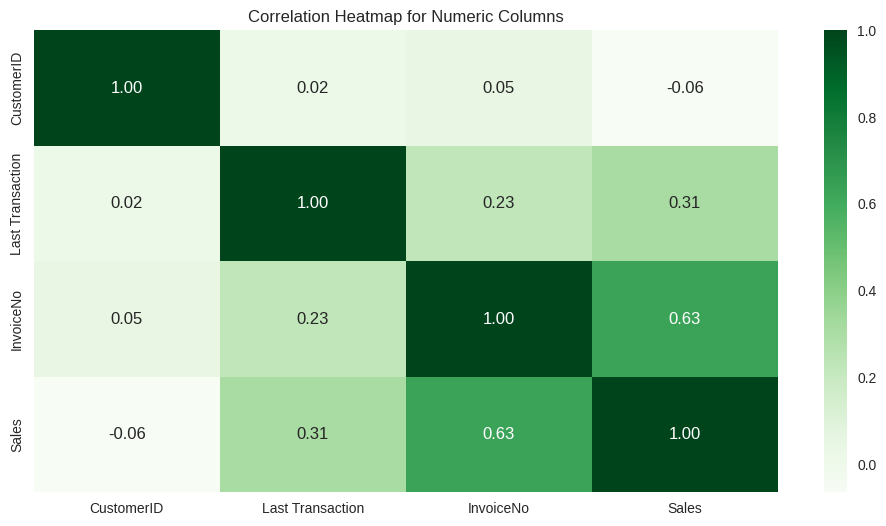

In [74]:
numeric_cols = new_df_iqr.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(12,6))
sns.heatmap(new_df_iqr[numeric_cols].corr(), cmap='Greens', annot=True, fmt=".2f")
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

Normalization of the given dataset


In [75]:
new2_df=new_df_iqr[['InvoiceNo','Last Transaction','Sales']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(new2_df)
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns=['InvoiceNo','Last Transaction','Sales']
scaled_df['Country']=new_df_iqr['Country']
scaled_df

,InvoiceNo,Last Transaction,Sales,Country
0,0.030960,0.957105,0.484200,Finland
1,0.074303,0.048257,0.473507,Italy
2,0.016512,0.828418,0.090092,Norway
3,0.086687,0.793566,0.675160,Norway
4,0.003096,0.544236,0.023978,Bahrain
...,...,...,...,...
3918,0.009288,0.742627,0.048656,United Kingdom
3919,0.006192,0.482574,0.021774,United Kingdom
3920,0.011352,0.335121,0.047969,United Kingdom
3921,0.779154,0.900804,0.564388,United Kingdom


K-Means Clustering --Plot the Graph usin gthe Elbow method

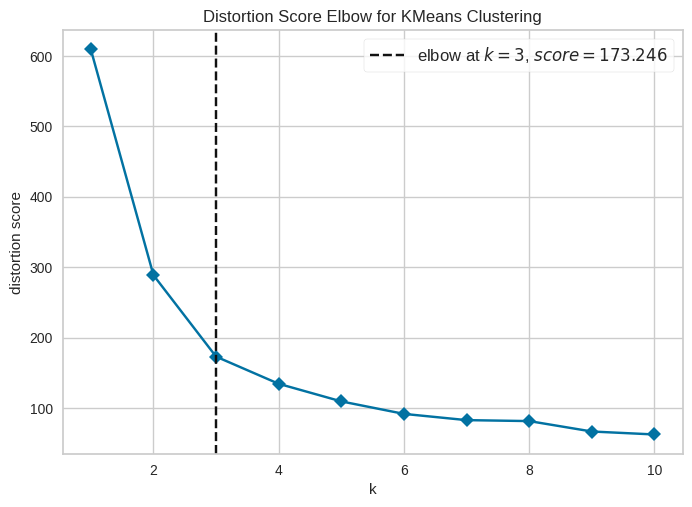

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
#Elbow method for Kmeans clustering
#Import Elbow Visualizer
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer  = KElbowVisualizer(model,k=(1,11),timings=False)
visualizer.fit(df_k)
visualizer.show()

In [77]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_k)
df_k['Clusters'] = y_predicted
df_k

,InvoiceNo,Last Transaction,Sales,Clusters
0,0.030960,0.957105,0.484200,1
1,0.074303,0.048257,0.473507,0
2,0.016512,0.828418,0.090092,2
3,0.086687,0.793566,0.675160,1
4,0.003096,0.544236,0.023978,2
...,...,...,...,...
3918,0.009288,0.742627,0.048656,2
3919,0.006192,0.482574,0.021774,0
3920,0.011352,0.335121,0.047969,0
3921,0.779154,0.900804,0.564388,1


In [78]:
km.cluster_centers_

array([[0.04054342, 0.21828644, 0.14960365],
       [0.15760362, 0.80074265, 0.63323941],
       [0.04271015, 0.77414313, 0.15731827]])

In [79]:
km.labels_

array([1, 0, 2, ..., 0, 1, 1], dtype=int32)

Model Evaluation

In [80]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.7831644139940375


**Hierarchical Clustering or Agglometraive Clustering**

In [81]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters =2)
hierarchical_cluster.fit_predict(df_k)

array([0, 1, 0, ..., 1, 0, 0])

In [82]:
y_predicted_hierarchical=km.fit_predict(df_k)
df_k['Clusters_hierarchical'] = y_predicted_hierarchical
df_k

,InvoiceNo,Last Transaction,Sales,Clusters,Clusters_hierarchical
0,0.030960,0.957105,0.484200,1,2
1,0.074303,0.048257,0.473507,0,1
2,0.016512,0.828418,0.090092,2,0
3,0.086687,0.793566,0.675160,1,2
4,0.003096,0.544236,0.023978,2,0
...,...,...,...,...,...
3918,0.009288,0.742627,0.048656,2,0
3919,0.006192,0.482574,0.021774,0,1
3920,0.011352,0.335121,0.047969,0,1
3921,0.779154,0.900804,0.564388,1,2


**DBSCAN -Density Based Spatial Clustering of Applications**

In [84]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=4)
y_predicted_dbscan = dbscan.fit_predict(df_k)
df_k['Clusters_dbscan'] = y_predicted_dbscan
df_k

,InvoiceNo,Last Transaction,Sales,Clusters,Clusters_hierarchical,Clusters_dbscan
0,0.030960,0.957105,0.484200,1,2,0
1,0.074303,0.048257,0.473507,0,1,1
2,0.016512,0.828418,0.090092,2,0,2
3,0.086687,0.793566,0.675160,1,2,0
4,0.003096,0.544236,0.023978,2,0,2
...,...,...,...,...,...,...
3918,0.009288,0.742627,0.048656,2,0,2
3919,0.006192,0.482574,0.021774,0,1,1
3920,0.011352,0.335121,0.047969,0,1,1
3921,0.779154,0.900804,0.564388,1,2,0


In [85]:
from sklearn.metrics import silhouette_score
score_dbscan = silhouette_score(df_k, dbscan.labels_, metric='euclidean')
print(score_dbscan)

0.8655304365919246
